In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("excercise.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [13]:
x = df.Mileage
y = df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

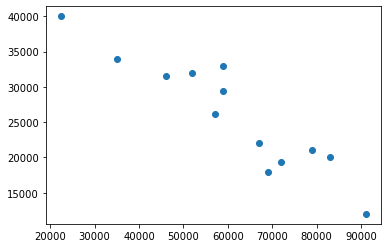

In [14]:
plt.scatter(x, y)

In [15]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [16]:
merged_df = pd.concat([df, dummies], axis=1)
merged_df

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [17]:
final_train_df = merged_df.drop(['Car Model', 'Audi A5'], axis=1)
final_train_df

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [19]:
x = final_train_df.drop('Sell Price($)', axis=1)
x

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [20]:
y = final_train_df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [21]:
model = LinearRegression()

In [22]:
model.fit(x, y)

LinearRegression()

In [23]:
model.predict([[45000, 4, 0, 1]])

array([36991.31721061])

In [24]:
model.predict([[86000, 7, 1, 0]])

array([11080.74313219])

In [26]:
model.score(x, y)

0.9417050937281083

In [27]:
model.predict([[59000, 5, 0, 0]])

array([28023.6135243])